### Computational Physics  
##### midtern exam 2024

**Question : Please analyze the full motion of a pendulum for the zero-G experience**  

a) The metal pendulum is initially at rest.  
b) You apply periodic external force to move the
pendulum (by magnet, for example)  
c) The mass of the pendulum reaches 60 degree
relative to its equilibrium position.  
d) Then, you remove magnet and the airplane lifts
off.  
e) Refer the previous page to see the motions of
the airplane.  
f) Eventually, the pendulum stops due to the air
drag and frictions  

A box with a pendulum in it is hung to the ceiling of the airplane room.  
The pivot adjusts the orientation of the box relative to the airplane
direction so that the angular momentum of the box-plane system is
conserved.  
Air can get in the box through the holes.  
Now, a pendulum is placed such that one end is fixed and the other
end has a ball of mass M with massless rigid rod.  
The airplane can change its maneuver to create different values of
gravity, for example, near zero-G.  
Please imagine you are inside the box and describe the motion of the
pendulum when the airplane travels in the sky for 2 minutes.  

**Model the motion of the pendulum as close as the reality for about 2.0 minutes.  
**Apply reasonable assumptions when modeling, especially for the frictions and air drag.  
Of course, assume the mass and length of the pendulum as well reasonably.  
** Model properly for the variable gravity using the previous graphs.  
1. your equation of the motion.  
2. plots of an angle, an angular velocity, an external driving force, and a gravity distribution as functions of time.  
3. python code and movie of the full motion of the pendulum.  
4. Please specify your assumptions and explain your solution  
5. What would happen if the pendulum goes near the Neutron Star where the gravity reaches to 10^12 m/s^2 ?  

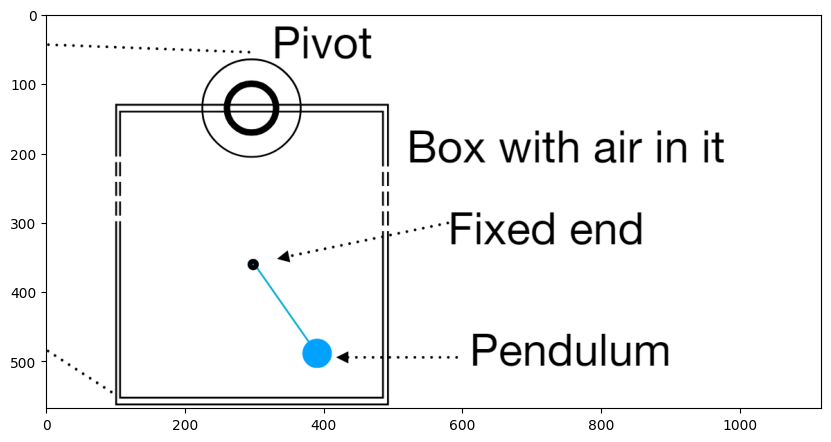

In [19]:
#figire.1

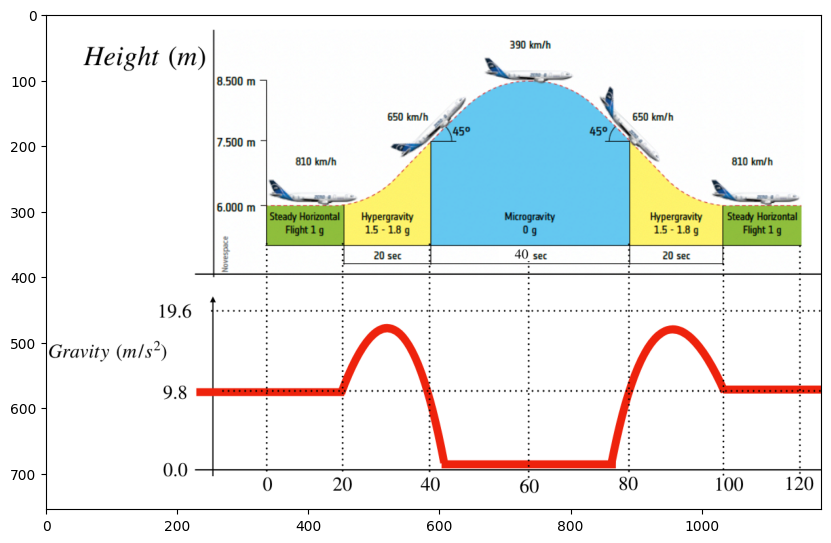

In [18]:
#figire.2

In [5]:
# damped oscillation

import pygame
import math

# pygame 초기화
pygame.init()

# 윈도우 크기 설정
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Damped Oscillation")

# 색상 정의
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# 시계 객체 생성
clock = pygame.time.Clock()

# 물리 변수
length = 10  # 진자 길이
theta = 60 * 3.14 / 180  # 초기 각도 (60도)
omega = 0  # 초기 각속도
gamma = 0.1  # 감쇠 상수
g = 10
# 픽셀 단위로 변환
scale = 10  # 1미터 당 픽셀 수
x0 = width * 0.5  # 고정점 x 좌표
y0 = height * 0.2  # 고정점 y 좌표
x = x0 + length * scale * math.sin(theta)  # 초기 x 좌표
y = y0 + length * scale * math.cos(theta)  # 초기 y 좌표

running = True
while running:
    # 이벤트 처리
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # 물리 계산
    alpha = -gamma * omega - (g / length) * math.sin(theta)
    omega_new = omega + alpha * 1 / 60
    theta_new = theta + omega_new * 1 / 60

    # 새 위치 계산
    x = x0 + length * scale * math.sin(theta_new)
    y = y0 + length * scale * math.cos(theta_new)

    # 화면 지우기
    screen.fill(BLACK)

    # 진자 그리기
    pygame.draw.line(screen,WHITE , (x0, y0), (x, y), 2)
    pygame.draw.circle(screen,WHITE , (x, y), 10)

    # 업데이트
    omega = omega_new
    theta = theta_new
    pygame.display.flip()
    clock.tick(60)

pygame.quit()

In [9]:
import pygame
import sys 

from math import *
import numpy as np
from numpy.linalg import inv

#setting color 
white = pygame.Color('white')
black = pygame.Color('black')

#setting screen  
width , height = 1000, 800
screen = pygame.display.set_mode((width,height))
screen.fill(black)

pygame.display.update()

clock = pygame.time.Clock()

count = 0

ll = 100
a = 0.0

x_center, y_center = width*0.5, height*0.2

#physics parameter 
g = 9.81
m1, m2 = 1.0, 1.0
l1, l2 = 2.0, 1.0

omega1, omega2 = 0.0, 0.0               # 초기 각속도
theta1, theta2 = 0.1, 60 * 3.14 / 180   # 초기 각도 
gamma = 0.5                             # 감쇠 상수

t, delta_t = 0.0, 0.01

y = np.array([omega1, omega2, theta1, theta2])
L = np.array([[ll,0.0],[0.0,1.0]])
F = np.array([0.0,0.0,0.0,0.0])

inv_L = inv(L)

#Slope(G) function
def G(t,y):
    F[0] = -m2 * l2 * y[1] * y[1] * sin(y[2] - y[3]) - (m1 + m2) * g * sin(y[2]) - gamma * y[0]
    F[1] = l1 * y[0] * y[0] * sin(y[2] - y[3]) - g * sin(y[3]) - gamma * y[1]
    F[2] = y[0]
    F[3] = y[1]

    L = np.array([
        [(m1+m2)*l1         , m2*cos(y[2]-y[3]) ,0  ,0],
        [l1*cos(y[2]-y[3])  , l2                ,0  ,0],
        [0                  , 0                 ,1  ,0],
        [0                  , 0                 ,0  ,1],
        ])
        
    return np.linalg.inv(L).dot(F)

#RK4 function 
def RK4(t, y, delta_t):
    k1 = G(t, y)
    k2 = G(t + 0.5*delta_t, y + 0.5*delta_t * k1)
    k3 = G(t + 0.5*delta_t, y + 0.5*delta_t * k2)
    k4 = G(t + 1.0*delta_t, y + 1.0*delta_t * k3)

    return (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0

def position(angle1, angle2):
    x1 = 100*l1 * sin(angle1) + x_center
    y1 = 100*l1 * cos(angle1) + y_center

    x2 = 100*l2 * sin(angle2) + x1
    y2 = 100*l2 * cos(angle2) + y1

    return (x1, y1), (x2, y2)

def square(x0,y0,x1,y1,length):
    m = (y1 - y0) / (x1 - x0)
    line_angle = np.arctan(m) - 90/180*np.pi

    length_2 = np.sqrt((x1-x0)**2 + (y1-y0)**2)

    x2 = (length*x1 - (length-length_2)*x0) / (length_2) 
    y2 = (length*y1 - (length-length_2)*y0) / (length_2) 
    
    s1 = (x0-length / 2*cos(line_angle),y0-length / 2*sin(line_angle))
    s2 = (x0+length / 2*cos(line_angle),y0+length / 2*sin(line_angle))
    s3 = (x2+length / 2*cos(line_angle),y2+length / 2*sin(line_angle))
    s4 = (x2-length / 2*cos(line_angle),y2-length / 2*sin(line_angle))

    print(np.arctan(m)*180/np.pi, line_angle*180/np.pi)
    return [s1,s2,s3,s4]

def render(position1_xy, position2_xy):
    square_pos = square(x_center, y_center, position1_xy[0], position1_xy[1], 400)

    screen.fill(black)

    # draw square position
    pygame.draw.line(screen,white,(square_pos[0]),(square_pos[1]),3)
    pygame.draw.line(screen,white,(square_pos[1]),(square_pos[2]),3)
    pygame.draw.line(screen,white,(square_pos[0]),(square_pos[3]),3)
    pygame.draw.line(screen,white,(square_pos[2]),(square_pos[3]),3)

    # draw pendulum 1 position 
    pygame.draw.line(screen, white,(x_center, y_center), (position1_xy[0],position1_xy[1]), 3)
    pygame.draw.circle(screen, white, (position1_xy[0],position1_xy[1]) , 10)
    # draw pendulum 2 position
    pygame.draw.line(screen, white,(position1_xy[0], position1_xy[1]), (position2_xy[0],position2_xy[1]), 3)
    pygame.draw.circle(screen, white, (position2_xy[0],position2_xy[1]) , 10)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
    count += 1

    position1_xy, position2_xy = position(y[2], y[3])
    render(position1_xy, position2_xy)

    t += delta_t
    y = y + delta_t * RK4(t, y, delta_t)

    clock.tick(60)
    pygame.display.update()

84.27042204869177 -5.7295779513082365
84.26783500916478 -5.732164990835204
84.26009446561865 -5.739905534381359
84.24720661307671 -5.752793386923281
84.22914552397327 -5.770854476026739
84.20585413020905 -5.7941458697909445
84.17724524829018 -5.822754751709818
84.14320265806431 -5.856797341935695
84.10358224766443 -5.896417752335561
84.0582132397818 -5.941786760218203
84.00689951741359 -5.993100482586416
83.94942107088262 -6.050578929117374
83.88553559231687 -6.114464407683124
83.81498024904586 -6.1850197509541465
83.73747367364822 -6.262526326351785
83.65271821581649 -6.347281784183503
83.56040250991865 -6.439597490081357
83.46020442224078 -6.539795577759225
83.35179445344188 -6.648205546558114
83.234839684693 -6.765160315307006
83.1090083701031 -6.8909916298969
82.9739752928874 -7.026024707112607
82.82942801746476 -7.170571982535227
82.67507418287643 -7.324925817123579
82.51064999241619 -7.489350007583807
82.33593005692926 -7.664069943070749
82.15073874031151 -7.849261259688498
81.95

ZeroDivisionError: float division by zero

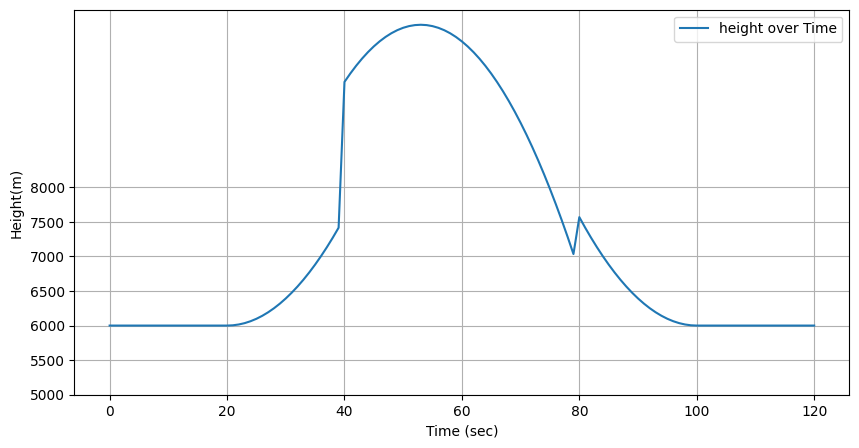

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin

#parameter 
g = 9.8  
h0 = 6000

def airplane_height(time, g):
    if time < 20:                   #steady horizontal flight
        h = h0 
        return h 
    elif 20 <= time < 40:           #hypergravity
        a = g * 1.8
        h = h0 + 0.5*(a-g)*((time-20)**2)
        return h 
    elif 40 <= time < 80:           #microgravity
        v0 = 180
        alpha = np.pi/4
        h = h0 + v0 * sin(alpha) * time - 0.5 * g * ((time-40)**2)
        return h  
    elif 80 <= time < 100:          #hypergravity
        a = g * 1.8
        t = time-100
        h = h0 + 0.5*(a-g)*(t**2)
        return h
    elif 100 <= time <= 120:        #steady horizontal flight
        h = h0
        return h 
    else:
        return 0

# Time range from 0 to 120
time_values = np.arange(0, 121)
height_values = [airplane_height(t, g) for t in time_values]

# Plotting the graph
plt.figure(figsize=(10,5))
plt.plot(time_values, height_values, label='height over Time')
y_ticks = np.arange(5000, 8500, 500)
plt.yticks(y_ticks)

plt.xlabel('Time (sec)')
plt.ylabel('Height(m)')

plt.grid(True)
plt.legend()
plt.show()


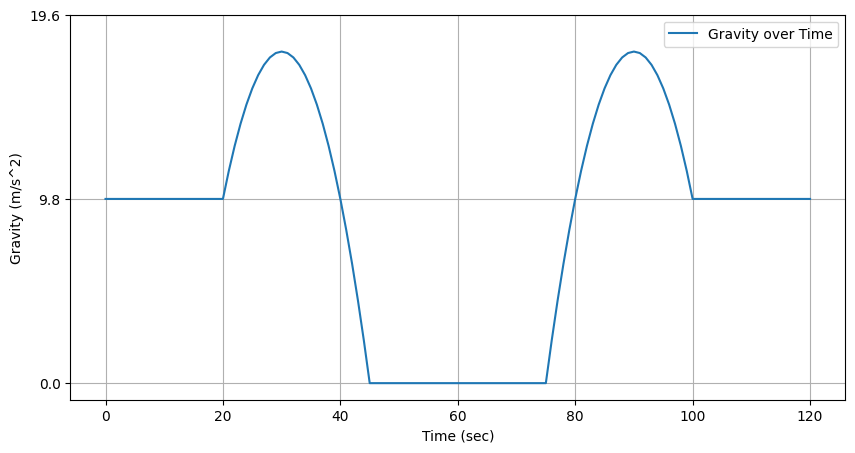

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Earth's gravity
g = 9.8  

# Define the airplane's gravity function
def cal_hypergravity(time, g):
    val = -0.008 * time**2 + 0.48 * time - 5.4
    return g * val 

def airplane_gravity(time, g):
    if time < 20:
        return g
    elif 20 <= time < 45:
        return cal_hypergravity(time, g)
    elif 40 <= time < 75:
        return 0 
    elif 75 <= time < 100:
        return cal_hypergravity(time-60, g)
    elif 100 <= time <= 120:
        return g

# Time range from 0 to 120
time_values = np.arange(0, 121)
gravity_values = [airplane_gravity(t, g) for t in time_values]

# Plotting the graph
plt.figure(figsize=(10,5))
plt.plot(time_values, gravity_values, label='Gravity over Time')
y_ticks = np.arange(0, max(gravity_values) + g, g)
plt.yticks(y_ticks)

plt.xlabel('Time (sec)')
plt.ylabel('Gravity (m/s^2)')

plt.grid(True)
plt.legend()
plt.show()
